# Exploratory Data Analysis and Data Preprocessing

## Import Necessary Packages

In [1]:
import pandas as pd

# set settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

## Load Datasets

In [2]:
movies_basics = pd.read_csv('D:/MovieRecommender.com/Data/movies.csv')
movies_basics.head()

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.00,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.00,3.86
1,1000002,Parasite,2019.00,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.00,4.56
2,1000003,Everything Everywhere All at Once,2022.00,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.00,4.30
3,1000004,Fight Club,1999.00,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.00,4.27
4,1000005,La La Land,2016.00,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.00,4.09


In [3]:
genres = pd.read_csv('D:/MovieRecommender.com/Data/genres.csv')
genres.head()

,id,genre
0,1000001,Comedy
1,1000001,Adventure
2,1000002,Comedy
3,1000002,Thriller
4,1000002,Drama


In [4]:
languages = pd.read_csv("D:/MovieRecommender.com/Data/languages.csv")
languages = languages.drop_duplicates(subset=['id'])
languages = languages.drop(columns=['type'])
languages.head()

,id,language
0,1000001,English
1,1000002,Korean
5,1000003,English
9,1000004,English
10,1000005,English


In [5]:
age_ratings = pd.read_csv("D:/MovieRecommender.com/Data/releases.csv")
age_ratings = age_ratings[age_ratings['country'] == 'USA']
age_ratings = age_ratings[['id', 'rating']]
age_ratings = age_ratings.dropna(subset=['rating'])
age_ratings = age_ratings.drop_duplicates(subset=['id'])
age_ratings.loc[age_ratings['rating'].isin(['PG-13', 'R', 'NC-17', 'NR']), 'rating'] = True
age_ratings.loc[age_ratings['rating'].isin(['G', 'PG']), 'rating'] = False
age_ratings = age_ratings.rename(columns={'rating' : 'adult'})
age_ratings.head()

,id,adult
74,1000001,True
199,1000002,True
274,1000003,True
349,1000004,True
455,1000005,True


In [6]:
posters = pd.read_csv("D:/MovieRecommender.com/Data/posters.csv")
posters.head()

,id,link
0,1000001,https://a.ltrbxd.com/resized/film-poster/2/7/7...
1,1000002,https://a.ltrbxd.com/resized/film-poster/4/2/6...
2,1000003,https://a.ltrbxd.com/resized/film-poster/4/7/4...
3,1000004,https://a.ltrbxd.com/resized/film-poster/5/1/5...
4,1000005,https://a.ltrbxd.com/resized/film-poster/2/4/0...


In [7]:
num_votes = pd.read_csv("D:/MovieRecommender.com/Data/TMDB_Dataset.csv")
num_votes = num_votes[['title', 'vote_count']]
num_votes.columns = ['name', 'num_votes']
num_votes.head()

,name,num_votes
0,Ariel,318.00
1,Shadows in Paradise,360.00
2,Four Rooms,2578.00
3,Judgment Night,326.00
4,Life in Loops (A Megacities RMX),27.00


In [8]:
movies = pd.merge(movies_basics, genres, how='inner', on=['id'])
movies = pd.merge(movies, languages, how='outer', on=['id'])
movies = pd.merge(movies, posters, how='outer', on=['id'])
movies = pd.merge(movies, age_ratings, how='inner', on=['id'])
movies = pd.merge(movies, num_votes, how='outer', on=['name'])
movies = movies.rename(columns={'link':'poster'})


In [9]:
movies.shape

(1248018, 12)

We now have our main dataset joined and loaded. Now it is time to clean it up and do some exploratory data analysis. 

## Data Cleaning

In [10]:
movies.shape

(1248018, 12)

### Dealing with nulls

In [11]:
movies.isnull().sum()

id              822424
name             23856
date            846274
tagline         973271
description     847967
minute          855386
rating         1025186
genre           846274
language        841779
poster          836577
adult           822424
num_votes         1439
dtype: int64

In [12]:
movies = movies.dropna(subset=['rating'])
movies.isnull().sum()

id                 0
name               0
date               0
tagline        42995
description        5
minute            37
rating             0
genre              0
language        4221
poster             4
adult              0
num_votes        375
dtype: int64

In [13]:
movies['minute'] = movies['minute'].fillna(movies['minute'].median())
movies = movies.dropna(subset=['language'])
movies.isnull().sum()

id                 0
name               0
date               0
tagline        40821
description        5
minute             0
rating             0
genre              0
language           0
poster             4
adult              0
num_votes        372
dtype: int64

In [14]:
print(movies.loc[movies['num_votes'] == 0].count())

id             80089
name           80089
date           80089
tagline        66603
description    80088
minute         80089
rating         80089
genre          80089
language       80089
poster         80088
adult          80089
num_votes      80089
dtype: int64


In [15]:
movies = movies[movies['num_votes'] > 0]
movies['num_votes'] = movies['num_votes'].fillna(movies['num_votes'].median())

In [16]:
movies.shape

(138150, 12)

### Change data types

In [17]:
movies.dtypes

id             float64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
genre           object
language        object
poster          object
adult           object
num_votes      float64
dtype: object

In [18]:
movies['adult'] = movies['adult'].astype(bool)

In [19]:
print(movies['genre'].nunique())

19


### One hot encode the genre and language features

In [20]:
#from sklearn.preprocessing import OneHotEncoder
movies = pd.get_dummies(movies, columns=['genre', 'language'])
movies.head()

,id,name,date,tagline,description,minute,rating,poster,adult,num_votes,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,language_Afrikaans,language_Arabic,language_Armenian,language_Bambara,language_Basque,"language_Bengali, Bangla",language_Bosnian,language_Cantonese,language_Catalan,language_Chinese,language_Croatian,language_Czech,language_Danish,language_Dutch,language_Dzongkha,"language_Eastern Punjabi, Eastern Panjabi",language_English,language_Estonian,language_Finnish,language_French,language_Galician,language_Georgian,language_German,language_Greek (modern),language_Hebrew (modern),language_Hindi,language_Hungarian,language_Icelandic,language_Indonesian,language_Inuktitut,language_Italian,language_Japanese,language_Kannada,language_Khmer,language_Korean,language_Kurdish,language_Latvian,language_Lingala,language_Lithuanian,language_Macedonian,language_Malay,language_Malayalam,language_Marathi,language_Mayan,language_Māori,language_No spoken language,language_Norwegian,language_Persian (Farsi),language_Polish,language_Portuguese,language_Romanian,language_Russian,language_Serbian,language_Slovene,language_Southern Sotho,language_Spanish,language_Swedish,language_Tagalog,language_Tamil,language_Telugu,language_Thai,"language_Tibetan Standard, Tibetan, Central",language_Tola,language_Turkish,language_Ukrainian,language_Urdu,language_Vietnamese,language_Welsh,language_Zulu
267,1008245.00,"""Sr.""",2022.00,Like father. Like son. Like no other.,A portrait of the life and career of Robert Do...,90.00,3.68,https://a.ltrbxd.com/resized/film-poster/9/1/3...,True,50.00,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
298,1053441.00,#1 Cheerleader Camp,2010.00,Grab your spirit sticks!,A pair of horny college guys get summer jobs a...,95.00,2.38,https://a.ltrbxd.com/resized/film-poster/2/3/6...,True,91.00,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
345,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,1729.00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
346,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,1729.00,False,True,False,False,False,False,False,False,False,False,False,Fals

In [21]:
movies.loc[movies['language_English'] == True, 'english'] = True
movies['english'] = movies['english'].fillna(False)
movies = movies.drop(columns=movies.loc[:,'language_Afrikaans':'language_Zulu'].columns)
movies.head()

C:\Users\ghohol\AppData\Local\Temp\ipykernel_7704\3359675175.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movies['english'] = movies['english'].fillna(False)


,id,name,date,tagline,description,minute,rating,poster,adult,num_votes,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,english
267,1008245.00,"""Sr.""",2022.00,Like father. Like son. Like no other.,A portrait of the life and career of Robert Do...,90.00,3.68,https://a.ltrbxd.com/resized/film-poster/9/1/3...,True,50.00,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
298,1053441.00,#1 Cheerleader Camp,2010.00,Grab your spirit sticks!,A pair of horny college guys get summer jobs a...,95.00,2.38,https://a.ltrbxd.com/resized/film-poster/2/3/6...,True,91.00,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
345,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,1729.00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
346,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,1729.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
347,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,1729.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
genre_cols = movies.loc[:, 'genre_Action':'genre_Western'].columns
movies[genre_cols] = movies.groupby(['id'])[genre_cols].transform('sum')
movies = movies.drop_duplicates(subset=['id'])
movies.head()

,id,name,date,tagline,description,minute,rating,poster,adult,num_votes,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,english
267,1008245.00,"""Sr.""",2022.00,Like father. Like son. Like no other.,A portrait of the life and career of Robert Do...,90.00,3.68,https://a.ltrbxd.com/resized/film-poster/9/1/3...,True,50.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,True
298,1053441.00,#1 Cheerleader Camp,2010.00,Grab your spirit sticks!,A pair of horny college guys get summer jobs a...,95.00,2.38,https://a.ltrbxd.com/resized/film-poster/2/3/6...,True,91.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
345,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,1729.00,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,False
350,1033427.00,#AnneFrank. Parallel Stories,2019.00,NaN,One single Anne Frank moves us more than the c...,92.00,3.31,https://a.ltrbxd.com/resized/film-poster/5/3/7...,True,48.00,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,True
385,1055800.00,#ChadGetsTheAxe,2022.00,NaN,Four social media influencers livestream their...,83.00,3.20,https://a.ltrbxd.com/resized/film-poster/9/4/8...,True,5.00,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,True


In [23]:
movies.columns = movies.columns.str.replace('genre_', '')
movies = movies.drop(columns=['TV Movie'])
movies.head()

,id,name,date,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,english
267,1008245.00,"""Sr.""",2022.00,Like father. Like son. Like no other.,A portrait of the life and career of Robert Do...,90.00,3.68,https://a.ltrbxd.com/resized/film-poster/9/1/3...,True,50.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,True
298,1053441.00,#1 Cheerleader Camp,2010.00,Grab your spirit sticks!,A pair of horny college guys get summer jobs a...,95.00,2.38,https://a.ltrbxd.com/resized/film-poster/2/3/6...,True,91.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
345,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,1729.00,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,False
350,1033427.00,#AnneFrank. Parallel Stories,2019.00,NaN,One single Anne Frank moves us more than the c...,92.00,3.31,https://a.ltrbxd.com/resized/film-poster/5/3/7...,True,48.00,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,True
385,1055800.00,#ChadGetsTheAxe,2022.00,NaN,Four social media influencers livestream their...,83.00,3.20,https://a.ltrbxd.com/resized/film-poster/9/4/8...,True,5.00,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,True


In [24]:
movies.dtypes

id                 float64
name                object
date               float64
tagline             object
description         object
minute             float64
rating             float64
poster              object
adult                 bool
num_votes          float64
Action               int64
Adventure            int64
Animation            int64
Comedy               int64
Crime                int64
Documentary          int64
Drama                int64
Family               int64
Fantasy              int64
History              int64
Horror               int64
Music                int64
Mystery              int64
Romance              int64
Science Fiction      int64
Thriller             int64
War                  int64
Western              int64
english               bool
dtype: object

### Change the one hot encoded genres to booleans

In [26]:
cols = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 
        'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western']

movies[cols] = movies[cols].astype(bool)

movies.dtypes

id                 float64
name                object
date               float64
tagline             object
description         object
minute             float64
rating             float64
poster              object
adult                 bool
num_votes          float64
Action                bool
Adventure             bool
Animation             bool
Comedy                bool
Crime                 bool
Documentary           bool
Drama                 bool
Family                bool
Fantasy               bool
History               bool
Horror                bool
Music                 bool
Mystery               bool
Romance               bool
Science Fiction       bool
Thriller              bool
War                   bool
Western               bool
english               bool
dtype: object

### Check and remove duplicates

In [27]:
print(movies.duplicated(subset=['name', 'date', 'minute']).sum())

2


In [28]:
movies = movies.drop_duplicates(subset=['name', 'date', 'minute'])
print(movies.duplicated(subset=['name', 'date', 'minute']).sum())


0


## Exploratory Data Analysis

In [29]:
movies.describe()

,id,date,minute,rating,num_votes
count,29510.00,29510.00,29510.00,29510.00,29510.00
mean,1031957.44,1995.42,94.45,3.12,611.80
std,26872.08,24.75,28.32,0.48,1881.07
min,1000001.00,1903.00,1.00,0.88,1.00
25%,1009271.50,1981.00,86.00,2.82,23.00
50%,1024709.00,2004.00,95.00,3.16,75.00
75%,1049843.75,2015.00,107.00,3.43,332.00
max,1139585.00,2024.00,566.00,4.69,35987.00


In [30]:
movies = movies[movies['minute'] > 45]
movies.shape

(27808, 29)

Removing anything below 45 minutes in length, thats not a movie.

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
analytical_features = movies.drop(columns=['id', 'name', 'tagline', 'description', 'poster'])


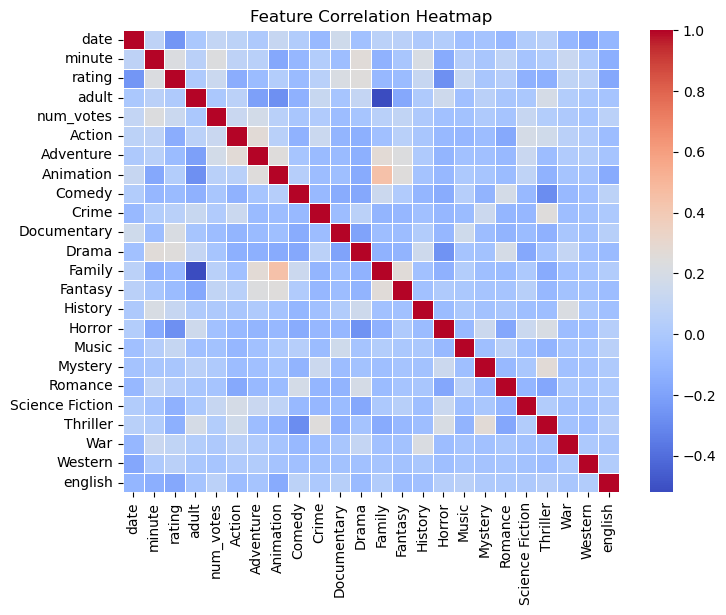

In [32]:
corr_matrix = analytical_features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

Doesn't look like anything worth noting here.

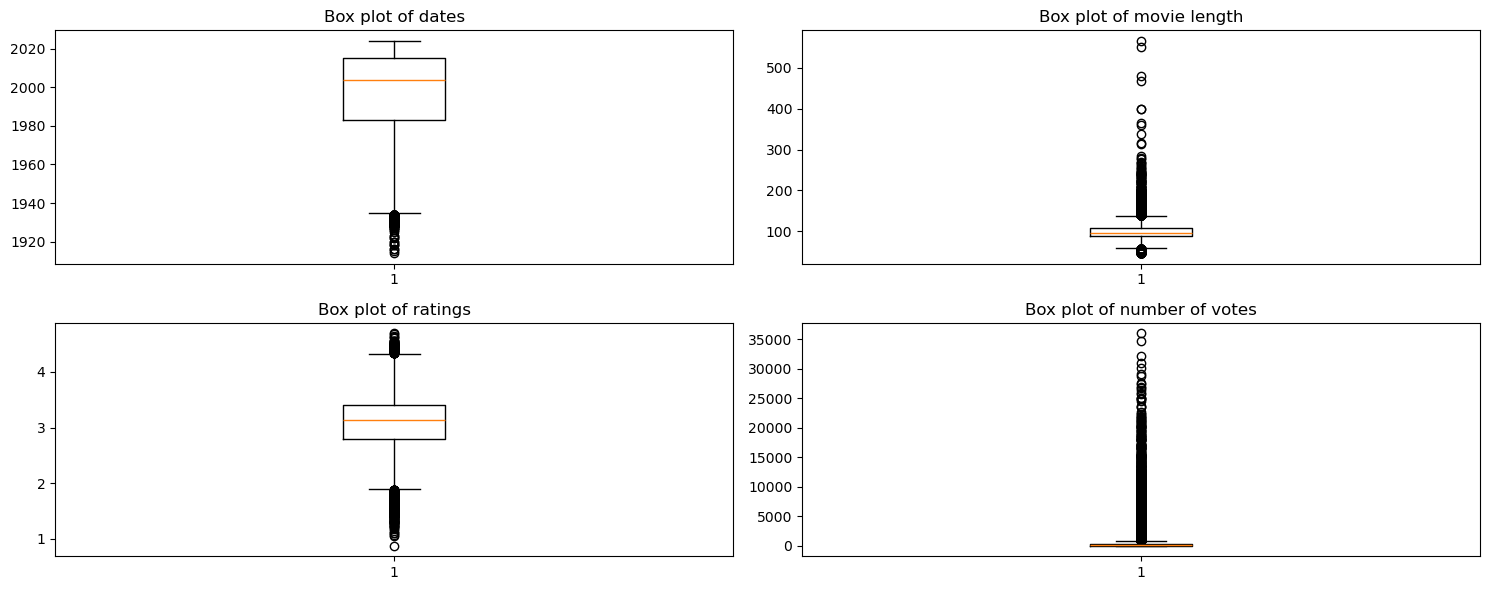

In [33]:
plt.figure(figsize=(15, 6))

# Box plot for date
plt.subplot(2, 2, 1)
plt.boxplot(movies['date'])
plt.title('Box plot of dates')

# Box plot for minute
plt.subplot(2, 2, 2)
plt.boxplot(movies['minute'])
plt.title('Box plot of movie length')

# Box plot for rating
plt.subplot(2, 2, 3)
plt.boxplot(movies['rating'])
plt.title('Box plot of ratings')

# Box plot for num_votes
plt.subplot(2, 2, 4)
plt.boxplot(movies['num_votes'])
plt.title('Box plot of number of votes')

plt.tight_layout()
plt.show()

Some weird outliers in the minute column, will remove those. Number of votes is very skewed.

In [34]:
movies = movies[movies['minute'] < 300]
movies.shape

(27797, 29)

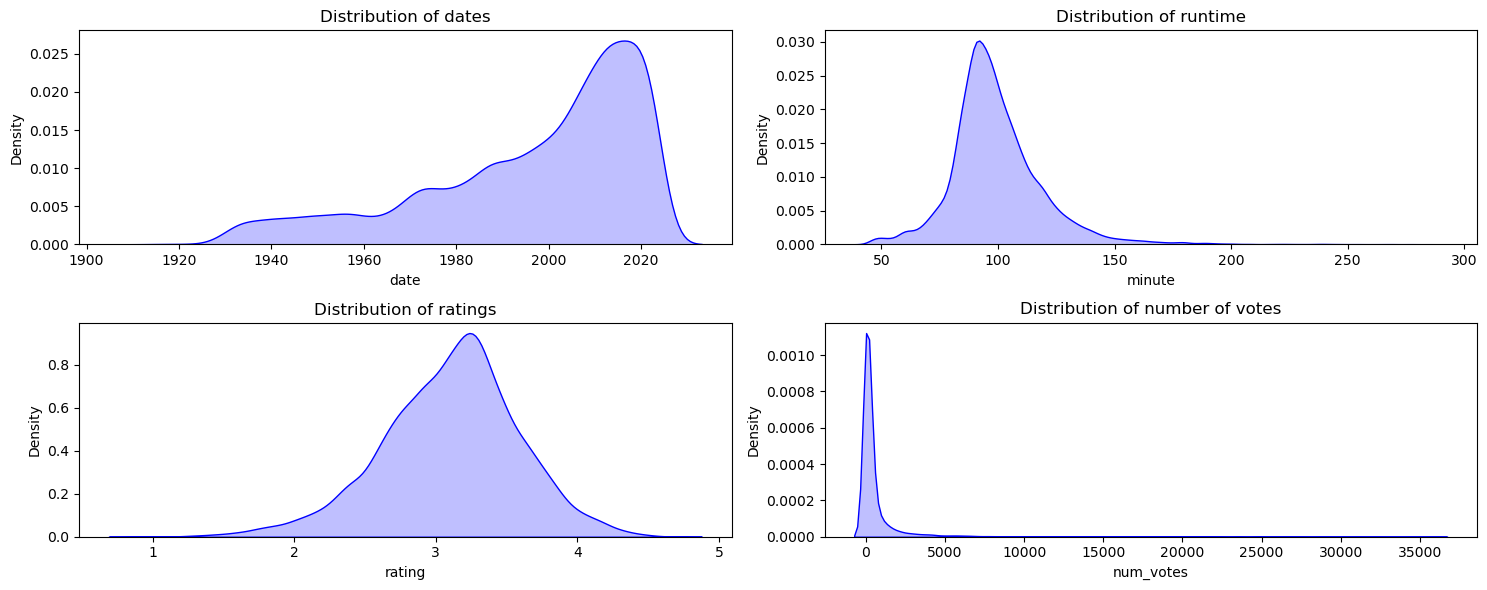

In [35]:
plt.figure(figsize=(15, 6))

# Plot for startYear
plt.subplot(2, 2, 1)
sns.kdeplot(movies['date'], color='blue', fill=True, legend=False)
plt.title('Distribution of dates')

# Plot for minute
plt.subplot(2, 2, 2)
sns.kdeplot(movies['minute'], color='blue', fill=True, legend=False)
plt.title('Distribution of runtime')

# Plot for rating
plt.subplot(2, 2, 3)
sns.kdeplot(movies['rating'], color='blue', fill=True, legend=False)
plt.title('Distribution of ratings')

# Plot for num_votes
plt.subplot(2, 2, 4)
sns.kdeplot(movies['num_votes'], color='blue', fill=True, legend=False)
plt.title('Distribution of number of votes')


plt.tight_layout()
plt.show()

date column is fairly skewed so will keep that in mind. Going to square root the num_votes feature to make it not quite so skewed.

In [36]:

movies['num_votes'] = np.sqrt(movies['num_votes'])

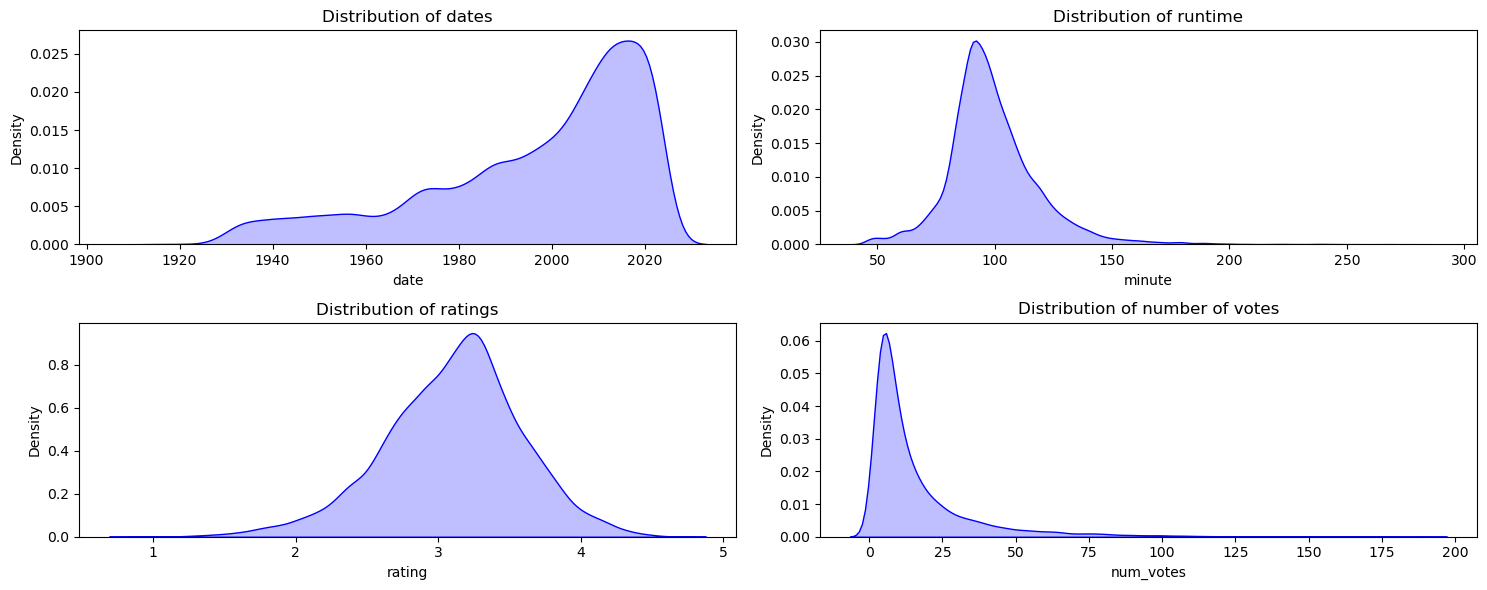

In [37]:
plt.figure(figsize=(15, 6))

# Plot for startYear
plt.subplot(2, 2, 1)
sns.kdeplot(movies['date'], color='blue', fill=True, legend=False)
plt.title('Distribution of dates')

# Plot for minute
plt.subplot(2, 2, 2)
sns.kdeplot(movies['minute'], color='blue', fill=True, legend=False)
plt.title('Distribution of runtime')

# Plot for rating
plt.subplot(2, 2, 3)
sns.kdeplot(movies['rating'], color='blue', fill=True, legend=False)
plt.title('Distribution of ratings')

# Plot for num_votes
plt.subplot(2, 2, 4)
sns.kdeplot(movies['num_votes'], color='blue', fill=True, legend=False)
plt.title('Distribution of number of votes')


plt.tight_layout()
plt.show()

This is obviously still skewed but a bit better. And I could log it to make it normal but I think it should be a bit skewed given the nature of having thousands of movies. 

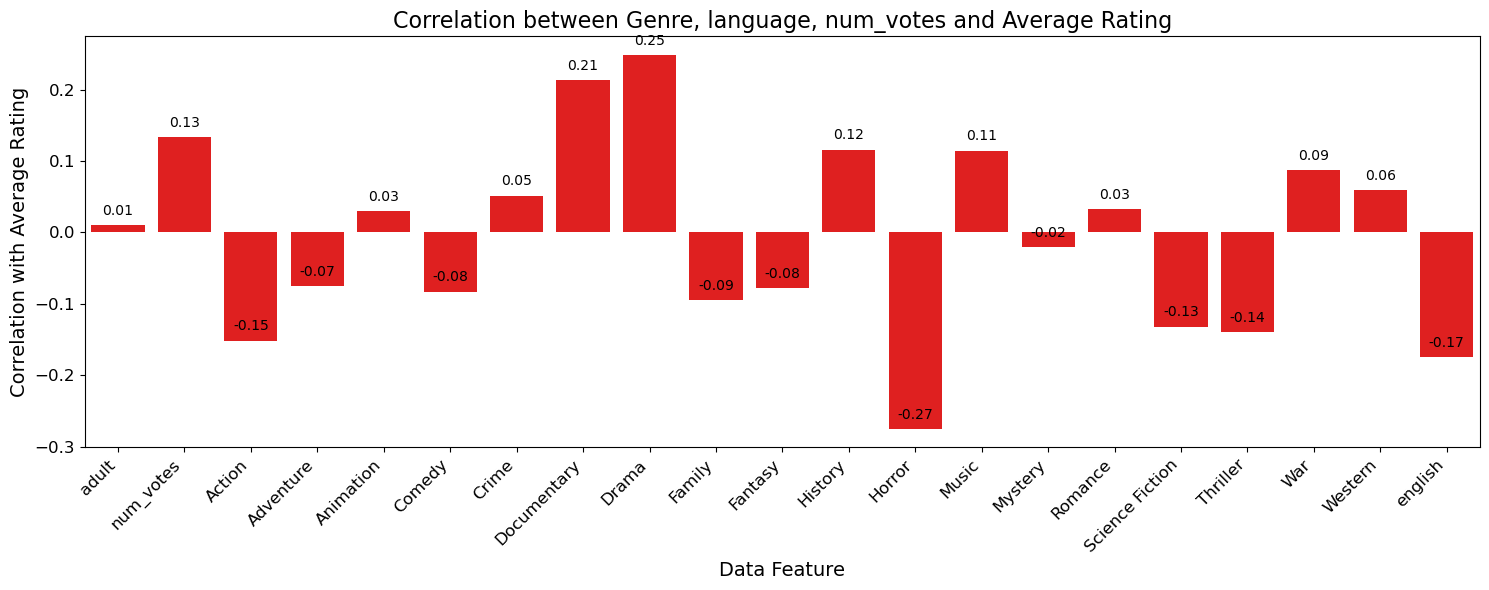

In [38]:
# Plotting the correlation values


genre_correlations = analytical_features.loc[:, 'rating':].corr()['rating']

# Plotting with Seaborn for improved aesthetics
plt.figure(figsize=(15, 6))
sns.barplot(x=genre_correlations.drop('rating').index, y=genre_correlations.drop('rating').values, color='red')
plt.title('Correlation between Genre, language, num_votes and Average Rating', fontsize=16)
plt.xlabel('Data Feature', fontsize=14)
plt.ylabel('Correlation with Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding annotations with correlation values
for i, value in enumerate(genre_correlations.drop('rating').values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

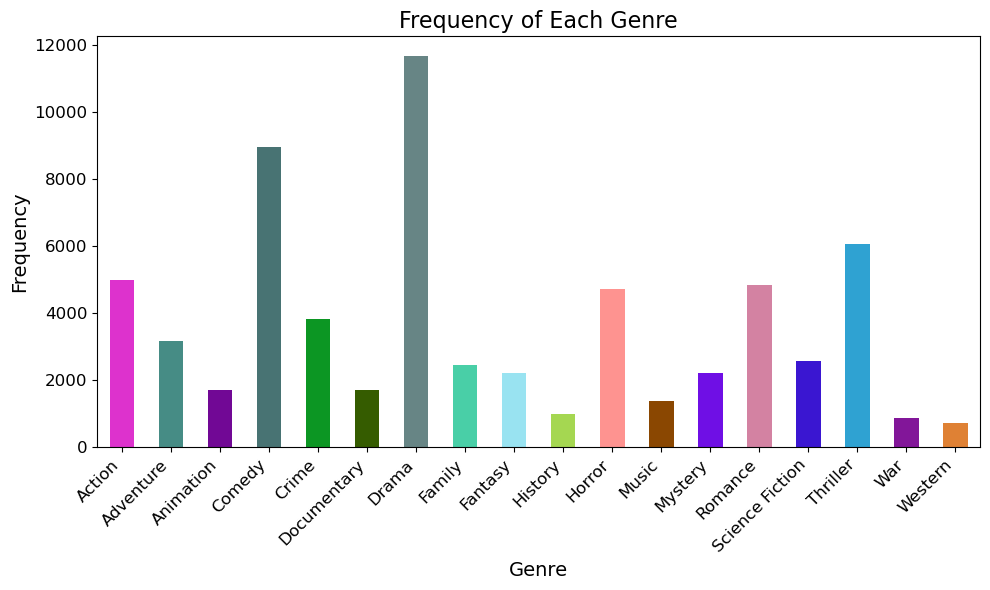

In [39]:
import random

colors = []
genre_counts = movies.loc[:, 'Action':].drop(columns=['english']).sum()
for _ in range(len(genre_counts)):
    colors.append('#%06x' % random.randint(0, 0xFFFFFF)) 


plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color=colors)
plt.title('Frequency of Each Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Save the finished dataset

In [40]:
movies.head()

,id,name,date,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,english
267,1008245.00,"""Sr.""",2022.00,Like father. Like son. Like no other.,A portrait of the life and career of Robert Do...,90.00,3.68,https://a.ltrbxd.com/resized/film-poster/9/1/3...,True,7.07,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
298,1053441.00,#1 Cheerleader Camp,2010.00,Grab your spirit sticks!,A pair of horny college guys get summer jobs a...,95.00,2.38,https://a.ltrbxd.com/resized/film-poster/2/3/6...,True,9.54,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
345,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,41.58,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
350,1033427.00,#AnneFrank. Parallel Stories,2019.00,NaN,One single Anne Frank moves us more than the c...,92.00,3.31,https://a.ltrbxd.com/resized/film-poster/5/3/7...,True,6.93,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True
385,1055800.00,#ChadGetsTheAxe,2022.00,NaN,Four social media influencers livestream their...,83.00,3.20,https://a.ltrbxd.com/resized/film-poster/9/4/8...,True,2.24,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [41]:
movies.shape

(27797, 29)

In [44]:
movies.to_csv('D:/MovieRecommender.com/Data/movies_cleaned.csv', index=False)